In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU
from tensorflow.keras.models import Sequential

In [ ]:
print(tensorflow.__version__)

2.13.0


In [ ]:
with open('hamlet.txt','r') as file:
    data = file.read().lower()

tokenizer=Tokenizer()
tokenizer.fit_on_texts([data])
total_words=len(tokenizer.word_index)+1

preprocessed_corpus = []

for line in data.split('\n'):
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(tokens)):
        n_grams_sequence=tokens[:i+1]
        preprocessed_corpus.append(n_grams_sequence)

max_len=max([len(x) for x in preprocessed_corpus])

input_data=np.array(pad_sequences(preprocessed_corpus,maxlen=max_len,padding='pre'))
print(f"Input shape: {input_data.shape}")

X=input_data[:,:-1]
y=input_data[:,-1]

y=to_categorical(y,num_classes=total_words)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Input shape: (25732, 14)


In [ ]:
# return_sequences=False is used when you need a summary of the sequence.
# return_sequences=True is used when you need to retain information from each step of the sequence.

model1=Sequential()
model1.add(Embedding(input_dim=total_words,output_dim=100,input_length=max_len-1))
model1.add(LSTM(units=300,return_sequences=True))
model1.add(Dropout(0.1))
model1.add(LSTM(100))
model1.add(Dense(units=total_words,activation="softmax"))
model1.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 100)           481800    
                                                                 
 lstm (LSTM)                 (None, 13, 300)           481200    
                                                                 
 dropout (Dropout)           (None, 13, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 4818)              486618    
                                                                 
Total params: 1610018 (6.14 MB)
Trainable params: 1610018 (6.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# return_sequences=False is used when you need a summary of the sequence.
# return_sequences=True is used when you need to retain information from each step of the sequence.

model2=Sequential()
model2.add(Embedding(input_dim=total_words,output_dim=100,input_length=max_len-1))
model2.add(GRU(units=300,return_sequences=True))
model2.add(Dropout(0.1))
model2.add(GRU(100))
model2.add(Dense(units=total_words,activation="softmax"))
model2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2=model2.fit(X_train,y_train,epochs=150)

Epoch 1/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0274 - loss: 7.1961
Epoch 2/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0319 - loss: 6.6351
Epoch 3/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0369 - loss: 6.4903
Epoch 4/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0407 - loss: 6.3546
Epoch 5/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0461 - loss: 6.2739
Epoch 6/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0462 - loss: 6.2158
Epoch 7/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0521 - loss: 6.1198
Epoch 8/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0529 - loss: 6.0970
Epoch 9/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0631 - loss: 6.0012
Epoch 10/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0737 - loss: 5.9071
Epoch 11/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0808 - loss: 5.7333
Epoch 12/150
644/644 ━━━━━━━━━━━━━━━━━

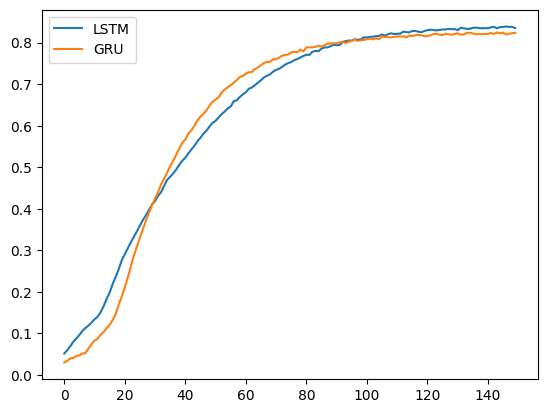

In [ ]:
plt.plot(history.history['accuracy'],label='LSTM')
plt.plot(history2.history['accuracy'],label='GRU')

plt.legend()
plt.show()

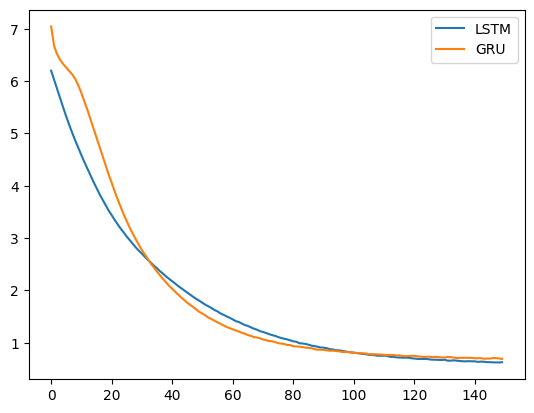

In [ ]:
plt.plot(history.history['loss'],label='LSTM')
plt.plot(history2.history['loss'],label='GRU')


plt.legend()
plt.show()

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [ ]:
input_text="But looke, the Morne in Russet mantle clad, Walkes o're the dew of yon high "
print(f"Input text:{input_text}")
max_sequence_len=model2.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:But looke, the Morne in Russet mantle clad, Walkes o're the dew of yon high 
Next Word PRediction:easterne


In [ ]:
model.save("next_word_lstm.h5")
model2.save("next_word_gru.h5")


In [ ]:
import pickle
with open('next_word_tokenizer.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)